# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
output_data_file = "output_data/cities.csv"

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
import sys
!{sys.executable} -m pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
            cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat.append(city_weather["coord"]["lat"])
        city_lng.append(city_weather["coord"]["lon"])
        city_max_temp.append(city_weather["main"]["temp_max"])
        city_humidity.append(city_weather["main"]["humidity"])
        city_clouds.append(city_weather["clouds"]["all"])
        city_wind.append(city_weather["wind"]["speed"])
        city_country.append(city_weather["sys"]["country"])
        city_date.append(city_weather["dt"])

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | hihifo
City not found. Skipping...
Processing Record 7 of Set 1 | itigi
Processing Record 8 of Set 1 | warrington
Processing Record 9 of Set 1 | atar
Processing Record 10 of Set 1 | lumeje
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | hovd
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | forestville
Processing Record 17 of Set 1 | coihaique
Processing Record 18 of Set 1 | paita
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | kokor

Processing Record 31 of Set 4 | rantepao
Processing Record 32 of Set 4 | twentynine palms
Processing Record 33 of Set 4 | shelton
Processing Record 34 of Set 4 | temaraia
City not found. Skipping...
Processing Record 35 of Set 4 | gilazi
City not found. Skipping...
Processing Record 36 of Set 4 | kahului
Processing Record 37 of Set 4 | sao felix do xingu
Processing Record 38 of Set 4 | boromo
Processing Record 39 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 4 | port-gentil
Processing Record 41 of Set 4 | zyryanka
Processing Record 42 of Set 4 | kitob
Processing Record 43 of Set 4 | grand forks
Processing Record 44 of Set 4 | de-kastri
Processing Record 45 of Set 4 | komsomolskiy
Processing Record 46 of Set 4 | anantapur
Processing Record 47 of Set 4 | bonfim
Processing Record 48 of Set 4 | north bend
Processing Record 49 of Set 4 | tongzi
Processing Record 0 of Set 5 | bowen
Processing Record 1 of Set 5 | rockland
Processing Record 2 of Set 5 | bushehr
Pr

City not found. Skipping...
Processing Record 23 of Set 8 | aflu
City not found. Skipping...
Processing Record 24 of Set 8 | cockburn town
Processing Record 25 of Set 8 | hirata
Processing Record 26 of Set 8 | santa isabel do rio negro
Processing Record 27 of Set 8 | kralendijk
Processing Record 28 of Set 8 | nusaybin
Processing Record 29 of Set 8 | chapais
Processing Record 30 of Set 8 | inhambane
Processing Record 31 of Set 8 | amderma
City not found. Skipping...
Processing Record 32 of Set 8 | norman wells
Processing Record 33 of Set 8 | cabo san lucas
Processing Record 34 of Set 8 | sinnamary
Processing Record 35 of Set 8 | pesochnoye
Processing Record 36 of Set 8 | zaqatala
Processing Record 37 of Set 8 | colares
Processing Record 38 of Set 8 | avera
Processing Record 39 of Set 8 | polunochnoye
Processing Record 40 of Set 8 | arcoverde
Processing Record 41 of Set 8 | uruzgan
Processing Record 42 of Set 8 | xuanhua
Processing Record 43 of Set 8 | geraldton
Processing Record 44 of S

Processing Record 13 of Set 12 | shemonaikha
Processing Record 14 of Set 12 | arequipa
Processing Record 15 of Set 12 | yining
Processing Record 16 of Set 12 | aubenas
Processing Record 17 of Set 12 | karasjok
Processing Record 18 of Set 12 | kenitra
Processing Record 19 of Set 12 | tawau
Processing Record 20 of Set 12 | pedasi
Processing Record 21 of Set 12 | yanan
City not found. Skipping...
Processing Record 22 of Set 12 | belmonte
Processing Record 23 of Set 12 | fagerstrand
Processing Record 24 of Set 12 | vangaindrano
Processing Record 25 of Set 12 | grande prairie
Processing Record 26 of Set 12 | vazante
Processing Record 27 of Set 12 | vardo
Processing Record 28 of Set 12 | salamiyah
Processing Record 29 of Set 12 | salalah
Processing Record 30 of Set 12 | perdoes
Processing Record 31 of Set 12 | chimoio
Processing Record 32 of Set 12 | laredo
Processing Record 33 of Set 12 | puerto ayacucho
Processing Record 34 of Set 12 | wanning
Processing Record 35 of Set 12 | moose factory

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data = pd.DataFrame({"City":city, 
                             "Lat":city_lat, 
                             "Lng":city_lng, 
                             "Max Temp":city_max_temp,
                             "Humidity":city_humidity,
                             "Cloudiness":city_clouds,
                             "Wind Speed":city_wind,
                             "Country":city_country,
                             "Date":city_date})

# Show Record Count
city_data.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tidore,62.4560,-114.3525,270.44,93,20,2.57,CA,1668369581
1,tidore,-34.5322,20.0403,288.28,82,0,0.82,ZA,1668369581
2,tidore,-46.1927,168.8643,283.57,85,56,2.06,NZ,1668369581
3,tidore,-21.2000,-175.2000,297.10,89,100,10.84,TO,1668369582
4,tidore,-23.1203,-134.9692,296.89,88,97,7.68,PF,1668369582


In [6]:
# Export the City_Data into a csv
city_data.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tidore,62.4560,-114.3525,270.44,93,20,2.57,CA,1668369581
1,tidore,-34.5322,20.0403,288.28,82,0,0.82,ZA,1668369581
2,tidore,-46.1927,168.8643,283.57,85,56,2.06,NZ,1668369581
3,tidore,-21.2000,-175.2000,297.10,89,100,10.84,TO,1668369582
4,tidore,-23.1203,-134.9692,296.89,88,97,7.68,PF,1668369582


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

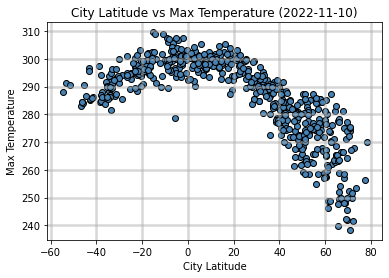

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data["Lat"], city_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

#set plot title
plt.title("City Latitude vs Max Temperature (2022-11-10)")

#x axis label
plt.xlabel("City Latitude")

#y axis label
plt.ylabel("Max Temperature")

#grid lines
plt.grid(linestyle='-', linewidth=2.5, alpha = 0.5)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

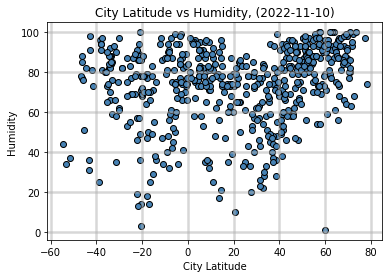

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data["Lat"], city_data["Humidity"], facecolor ="steelblue", edgecolor = "black")

#set plot title
plt.title("City Latitude vs Humidity, (2022-11-10)")

#x axis label
plt.xlabel("City Latitude")

##y axis label
plt.ylabel("Humidity")

#grid lines
plt.grid(linestyle='-', linewidth=2.5, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

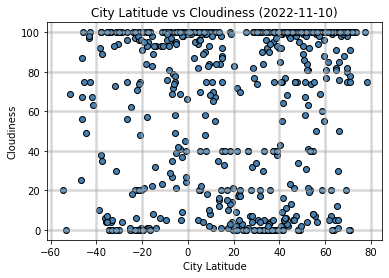

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data["Lat"], city_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

#set plot title
plt.title("City Latitude vs Cloudiness (2022-11-10)")

#x axis label
plt.xlabel("City Latitude")

#y axis label
plt.ylabel("Cloudiness")

#grid lines
plt.grid(linestyle='-', linewidth=2.5, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

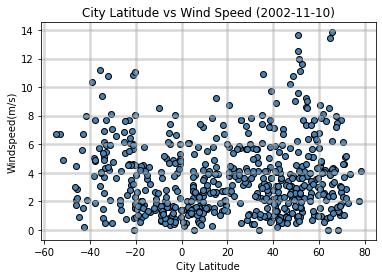

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data["Lat"], city_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#set plot title
plt.title("City Latitude vs Wind Speed (2002-11-10)")

#x axis label
plt.xlabel("City Latitude")

#y axis label
plt.ylabel("Windspeed(m/s)")

#grid lines
plt.grid(linestyle='-', linewidth=2.5, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data.loc[city_data["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tidore,62.4560,-114.3525,270.44,93,20,2.57,CA,1668369581
6,tidore,53.3925,-2.5802,285.07,85,20,4.12,GB,1668369582
7,tidore,20.5169,-13.0499,300.69,10,2,3.78,MR,1668369583
9,tidore,5.4112,100.3354,299.95,95,20,1.54,MY,1668369509
10,tidore,48.0056,91.6419,270.60,46,100,2.45,MN,1668369584


In [13]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-value is : {st.pearsonr(x,y)[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    return line_eq

#Annotate function
def annotate(line_eq, a,b):
     plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data.loc[city_data["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,tidore,-34.5322,20.0403,288.28,82,0,0.82,ZA,1668369581
2,tidore,-46.1927,168.8643,283.57,85,56,2.06,NZ,1668369581
3,tidore,-21.2000,-175.2000,297.10,89,100,10.84,TO,1668369582
4,tidore,-23.1203,-134.9692,296.89,88,97,7.68,PF,1668369582
5,tidore,-5.7000,34.4833,296.63,50,100,1.62,TZ,1668369582


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8539752124982329


Text(0, 0.5, 'Max Temp')

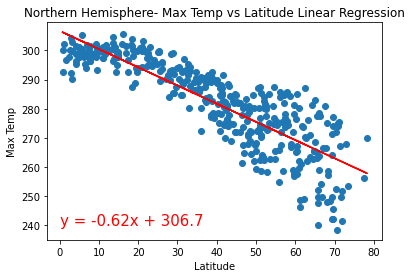

In [20]:
# Linear regression on Northern Hemisphere
#call the linear regression function
northern_hemi = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

#call the annotate function
annotate(northern_hemi, 0, 240)

#set plot title
plt.title("Northern Hemisphere- Max Temp vs Latitude Linear Regression")

#x axis label
plt.xlabel("Latitude")

#y axis label
plt.ylabel("Max Temp")

The r-value is : 0.6869028435989227


Text(0, 0.5, 'Max Temp')

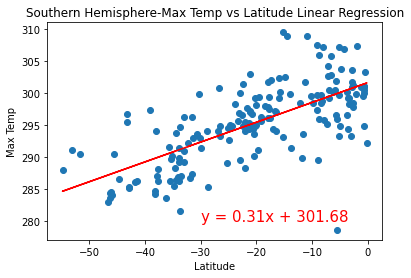

In [19]:
# Linear regression on Southern Hemisphere
#call the linear regression function
southern_hemi = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

#call the annotate function
annotate(southern_hemi, -30, 280)

#set the plot title
plt.title("Southern Hemisphere-Max Temp vs Latitude Linear Regression")

#x axis label
plt.xlabel("Latitude")

#y axis label
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** There seems to be a strong negative correlation between max temp and latitude for the northern hemisphere and a positive correlation for the southern hemisphere 

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.26467620451262863


Text(0, 0.5, 'Humidity')

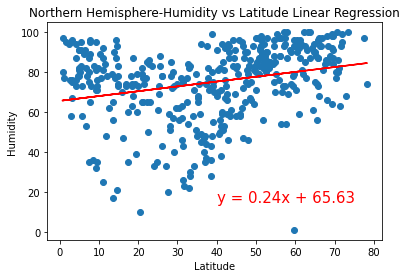

In [17]:
# Northern Hemisphere
northern_hemi = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

#call the annotate function
annotate(northern_hemi, 40, 15)

#set the plot title
plt.title("Northern Hemisphere-Humidity vs Latitude Linear Regression")

#x axis label
plt.xlabel("Latitude")

#y axis label
plt.ylabel("Humidity")

The r-value is : 0.00035782154945947567


Text(0, 0.5, 'Humidity')

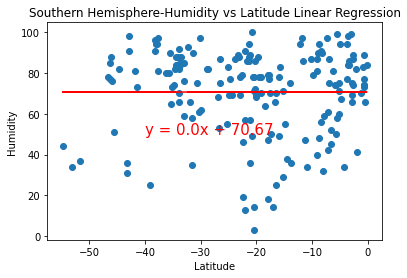

In [18]:
# Southern Hemisphere
southern_hemi = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

#call the annotate function
annotate(southern_hemi, -40, 50)

#set the plot title
plt.title("Southern Hemisphere-Humidity vs Latitude Linear Regression")

#x axis label
plt.xlabel("Latitude")

#y axis label
plt.ylabel("Humidity")

**Discussion about the linear relationship:** there is a relative positive correlation between Latitude and humidity in the northern hemisphere and also in the southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.16868762827991693


Text(0, 0.5, 'Cloudiness')

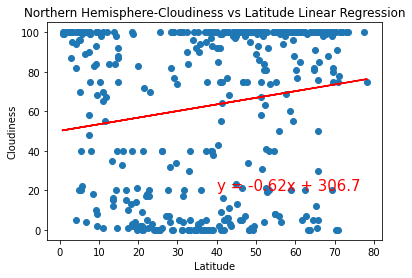

In [23]:
# Northern Hemisphere
nortthern_hemi = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

#call the annotate function
annotate(northern_hemi, 40, 20)

#set the plot title
plt.title("Northern Hemisphere-Cloudiness vs Latitude Linear Regression")

#x axis label
plt.xlabel("Latitude")

#y axis label
plt.ylabel("Cloudiness")

The r-value is : 0.18512619116298265


Text(0, 0.5, 'Cloudiness')

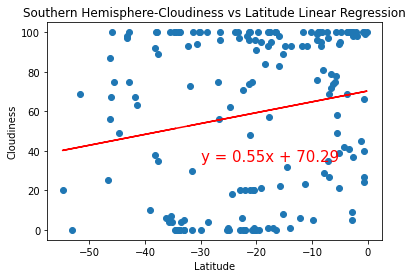

In [24]:
#southern hemisphere
southern_hemi = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

#call the annotate function
annotate(southern_hemi, -30, 35)

#set the plot title
plt.title("Southern Hemisphere-Cloudiness vs Latitude Linear Regression")

#x axis label
plt.xlabel("Latitude")

#y axis label
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** weak positive correlation between latitue and cloudiness for both northern and southern hemispheres

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.1556355031426606


Text(0, 0.5, 'Wind Speed')

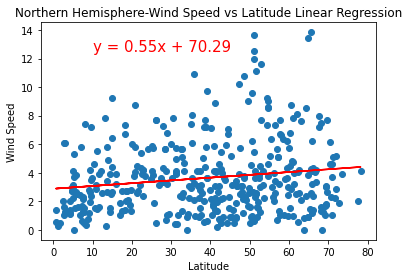

In [25]:
# Northern Hemisphere
northern_hemi = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

#call the annotate function
annotate(southern_hemi, 10, 12.5)

#set the plot title
plt.title("Northern Hemisphere-Wind Speed vs Latitude Linear Regression")

#x axis label
plt.xlabel("Latitude")

#y axis label
plt.ylabel("Wind Speed")

The r-value is : -0.26541383818604924


Text(0, 0.5, 'Wind Speed')

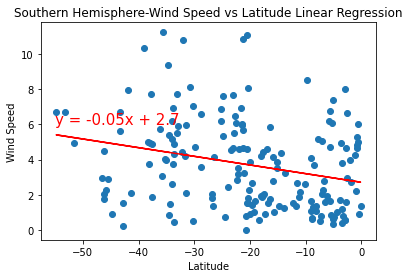

In [26]:
# Southern Hemisphere
southern_hemi = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

#call the annotate function
annotate(southern_hemi, -55,6)

#set the plot title
plt.title("Southern Hemisphere-Wind Speed vs Latitude Linear Regression")

#x axis label
plt.xlabel("Latitude")

#y axis label
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** there is a weak positive between wind speed and latitude in the northern hemisphere and a weak negetive between wind speed and latitude in the southern hemisphere